<a href="https://colab.research.google.com/github/imR2D2/linearRegressionTwo/blob/main/linearRegressionTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn.linear_model as lm
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/mineriaDatos/vehiculosProcesado.csv"
data = pd.read_csv(ruta, encoding='latin')

Mounted at /gdrive


In [ ]:
data

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,consumo_std,desplazamiento_std
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,17,522.764706,-0.653195,-0.613385
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,0.676220
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,16,555.437500,-0.881324,-0.613385
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,13,683.615385,-1.565710,0.676220
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,16,555.437500,-0.881324,0.372783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35534,Yugo,GV Plus/GV/Cabrio,1990,1.3,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,25,355.480000,1.171834,-1.523695
35535,Yugo,GV/GVX,1987,1.1,4.0,Manual 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,26,341.807692,1.399962,-1.675413
35536,Yugo,GV/GVX,1989,1.1,4.0,Manual 4-spd,Front-Wheel Drive,Subcompact Cars,Regular,26,341.807692,1.399962,-1.675413
35537,Yugo,GV/GVX,1989,1.3,4.0,Manual 5-spd,Front-Wheel Drive,Subcompact Cars,Regular,25,355.480000,1.171834,-1.523695


# CO2 - CONSUMO

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



El valor del CO2 en base al desplazamiento para 300 es: [26.73073057]

La linea intersecta en:  38.80662399657243 y tiene una pendiente de [-0.04025298]


<Axes: xlabel='co2', ylabel='consumo'>

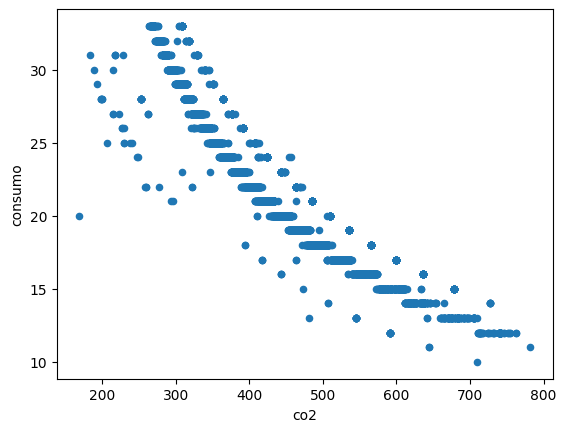

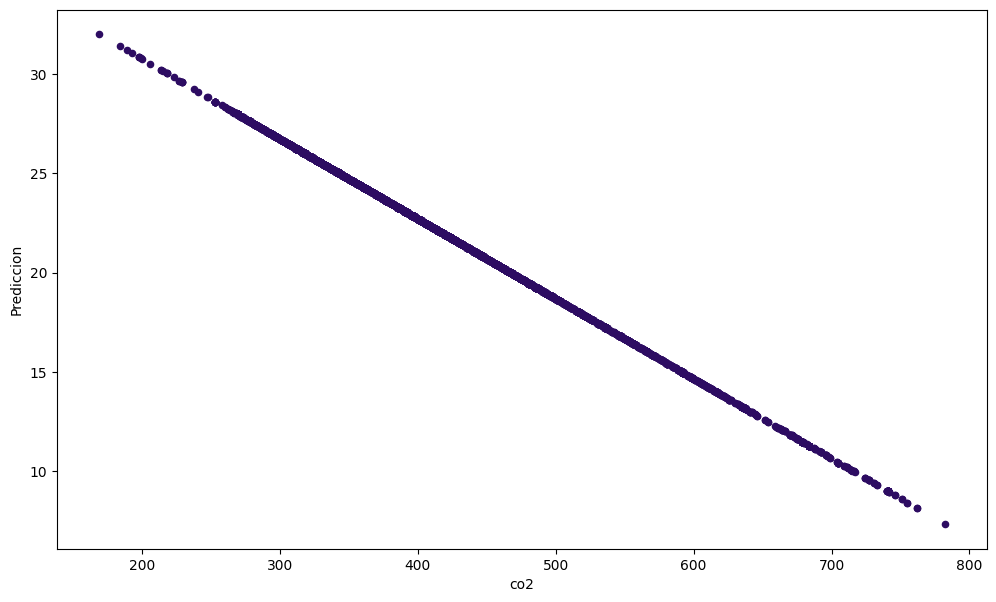

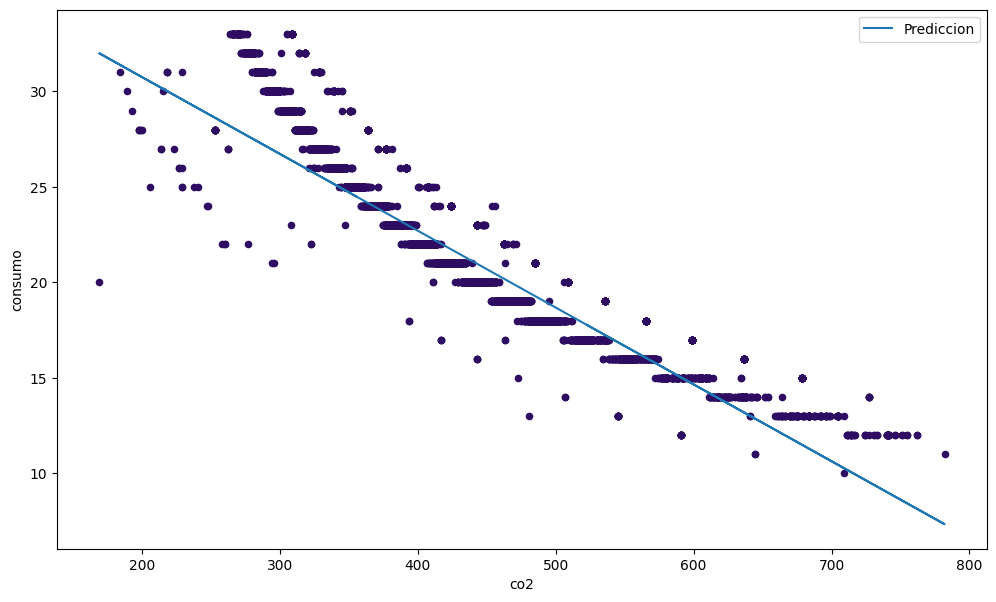

In [ ]:
#Graficar con la variable de CO2 como variable X
#Data frame, grafica de dispersion
data.plot.scatter(x='co2', y='consumo')

#Creando la regresion
#Iniciar modelo
regConsumo = lm.LinearRegression()
#Entrenarlo con fit que tenemos que ajustar los datos, para que sepa en que se basara de los datos
regConsumo.fit(data[["co2"]], data["consumo"])

#Colocar valores para predecir de CONSUMO
valorPredecirConsumo = 300

prediccion = regConsumo.predict([[valorPredecirConsumo]])
print('')
print(f"El valor del CO2 en base al desplazamiento para {valorPredecirConsumo} es: {prediccion}")
print('')
print(f"La linea intersecta en:  {regConsumo.intercept_} y tiene una pendiente de {regConsumo.coef_}")

predi = regConsumo.coef_ * data["co2"] + regConsumo.intercept_
data["Prediccion"] = predi

#Graficar la edad contra la prediccion
data.plot.scatter(x="co2", y="Prediccion", color="#2d0c62", figsize=(12,7))
ax = data.plot.line(x="co2", y="Prediccion")

#Le decimos que los ejes son los de la grafica de arriba, lo que esta en la variable ax
data.plot.scatter(x='co2', y='consumo', ax=ax, color="#2d0c62", figsize=(12,7))

Podemos observar que tenemos una "recta descendente" o una "recta negativa". Esto significa que a medida que aumenta el valor de una variable independiente, el valor de la variable dependiente disminuye. La pendiente de esta recta sería negativa.

# CO2 - DESPLAZAMIENTO

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



El valor del CO2 en base al desplazamiento para 730 es: [5.92787671]

La linea intersecta en:  -1.4435077006439854 y tiene una pendiente de [0.01009779]


<Axes: xlabel='co2', ylabel='desplazamiento'>

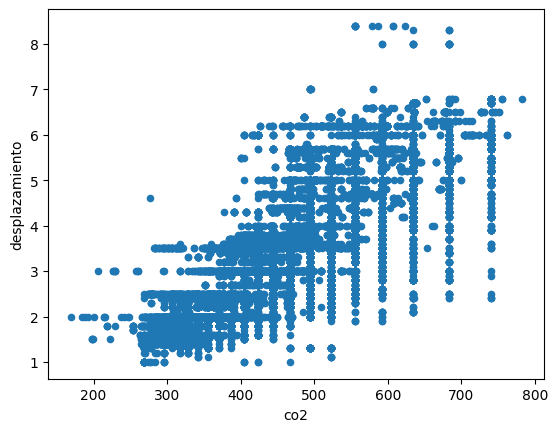

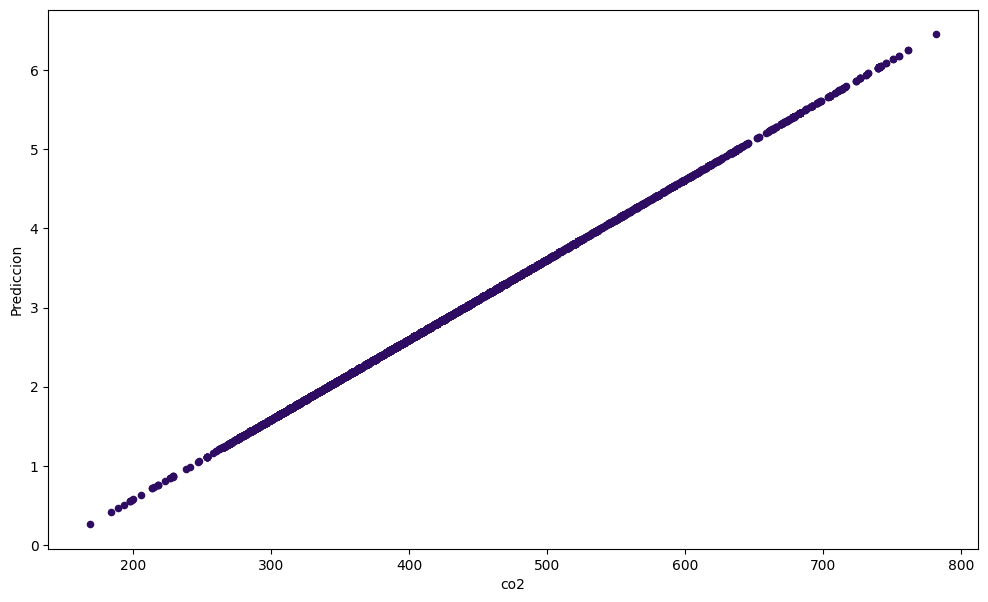

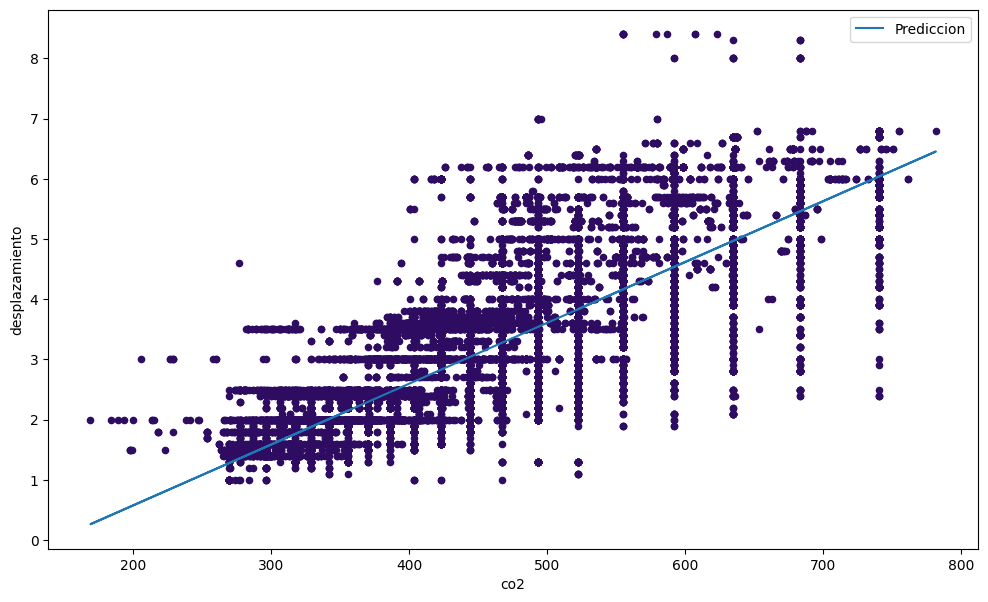

In [ ]:
data.plot.scatter(x='co2', y='desplazamiento')

regDesplazamiento = lm.LinearRegression()
regDesplazamiento.fit(data[["co2"]], data["desplazamiento"])

valorPredecir = 730

prediccion = regDesplazamiento.predict([[valorPredecir]])
print('')
print(f"El valor del CO2 en base al desplazamiento para {valorPredecir} es: {prediccion}")
print('')
print(f"La linea intersecta en:  {regDesplazamiento.intercept_} y tiene una pendiente de {regDesplazamiento.coef_}")

predi = regDesplazamiento.coef_ * data["co2"] + regDesplazamiento.intercept_
data["Prediccion"] = predi

#Graficar la edad contra la prediccion
data.plot.scatter(x="co2", y="Prediccion", color="#2d0c62", figsize=(12,7))
ax = data.plot.line(x="co2", y="Prediccion")

#Le decimos que los ejes son los de la grafica de arriba, lo que esta en la variable ax
data.plot.scatter(x='co2', y='desplazamiento', ax=ax, color="#2d0c62", figsize=(12,7))

## *CONCLUSION: Los datos que tenemos son multivariables ya que todas las variables, ya que X lo podemos relacionar con muchas otras variables para sacar una analisis, razon por la cual decidi hacer el analisis del co2 sobre las varibles numericas para poder sacar una regresion lineal*